In [14]:
# %%html

# <style>
#     .jp-OutputArea-child {
#         display: inline-block;
#     }
# </style>

In [2]:
import reddit
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

In [3]:
# ## Downloads the subreddits from the list

# #Parameters
# DATE_MIN = "2018-01-01"
# DATE_MAX = None
# subreddit_list = ['askreddit', 'worldnews']
# #fields=['author', 'title', 'domain', "created_utc", 'id']
# fields = None

# #Downloads it
# df = pd.DataFrame()
# for subreddit in subreddit_list:
    
#     df_sub = reddit.download_posts(subreddit, date_min=DATE_MIN, date_max = DATE_MAX, fields = fields) #Downloads submission data from pushshift.io
#     df_sub = reddit.update_praw(df_sub) #Adds updated scores from praw (reddit api)
    
#     df_sub.to_csv('data/' + subreddit + '_' + DATE_MIN + '.csv', index=False) #Saves dataframes of each subreddit
    
#     df = df.append(df_sub, sort = True) #Appends dataframe

# #Saves dataframe
# str_save = 'brazilian_subreddits_' + DATE_MIN + '.csv'
# df.to_csv(str_save, index=False) #Saves final dataframe
df = pd.read_csv('data/askreddit_2015.gzip')

/home/joaopn/Software/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1,2,3,5,6,7,13,16,17,20,22,23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/home/joaopn/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/joaopn/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/joaopn/Software/miniconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/joaopn/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


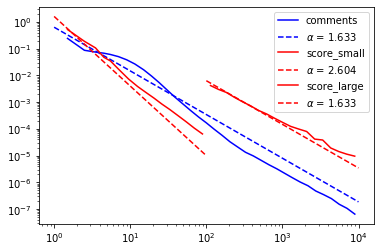

In [13]:
#Power-laws?
n_comm = np.array(df['num_comments_updated'])
score = np.array(df['score_updated'])

fit_ncomm = powerlaw.Fit(n_comm[n_comm>0], xmax=1e4, xmin=1)
fit_score_small = powerlaw.Fit(score[score>0],  xmax=1e2, xmin=1)
fit_score_large = powerlaw.Fit(score[score>0],  xmax=1e4, xmin=1e2)

fit_ncomm.plot_pdf(color='b')
fit_ncomm.power_law.plot_pdf(color='b', linestyle='--')

fit_score_small.plot_pdf(color='r')
fit_score_small.power_law.plot_pdf(color='r', linestyle='--')

fit_score_large.plot_pdf(color='r')
fit_score_large.power_law.plot_pdf(color='r', linestyle='--')

# powerlaw.plot_pdf(n_comm[n_comm>0])
# powerlaw.plot_pdf(score[score>0])
str_alpha_ncomm = r'$\alpha$ = {:0.3f}'.format(fit_ncomm.power_law.alpha)
str_alpha_score_small = r'$\alpha$ = {:0.3f}'.format(fit_score_small.power_law.alpha)
str_alpha_score_large = r'$\alpha$ = {:0.3f}'.format(fit_score_large.power_law.alpha)
plt.legend(['comments', str_alpha_ncomm, 'score_small',str_alpha_score_small, 'score_large',str_alpha_score_large])